In [2]:
import pandas as pd

from python_function.clustered_data_function import clustered_data_function
from python_function.cluster_plot_function import cluster_plot_function
from python_function.parameter_plot_function_clusterwise import parameter_plot_function_clusterwise
from python_function.parameter_plot_function import parameter_plot_function
from python_function.cluster_check_function import cluster_check_function

In [3]:
data_1='input_files/net_installed_capacity.csv'
ins_cap=pd.read_csv(data_1)
data_3='input_files/gini.csv'
gini_ins=pd.read_csv(data_3)

technology=ins_cap.columns.values.tolist()
technology.pop(0)
print('Key technologies in the system are: ', technology)

Key technologies in the system are:  ['wind_onshore', 'wind_offshore', 'roof_mounted_pv', 'open_field_pv', 'biofuel_supply', 'waste_supply', 'electrolysis', 'battery', 'heat_storage_big', 'heat_storage_small', 'hydrogen_storage']


In [9]:
display_tech=input("Which one technology clusters do you want to see: ")

Which one technology clusters do you want to see: biofuel_supply


In [10]:
display_technology=display_tech.split(",")
data_2='display_parameters/{}.csv'.format(display_technology[0])
paper_metrics=pd.read_csv(data_2)

Ideal number of cluster: 3
Techology: biofuel_supply
cluster ID: 1
Number of SPORES: 172
Id of representative SPORE: 40
Installed capacity of representative SPORE: 176.3706099GW
Minimum install capacity in the cluster: 0.0GW
Maxmium install capacity in the cluster: 331.9438428GW

cluster ID: 2
Number of SPORES: 121
Id of representative SPORE: 160
Installed capacity of representative SPORE: 551.1865037GW
Minimum install capacity in the cluster: 332.2013282GW
Maxmium install capacity in the cluster: 751.1630539GW

cluster ID: 3
Number of SPORES: 147
Id of representative SPORE: 384
Installed capacity of representative SPORE: 1022.297948GW
Minimum install capacity in the cluster: 761.1025122GW
Maxmium install capacity in the cluster: 1525.732712GW



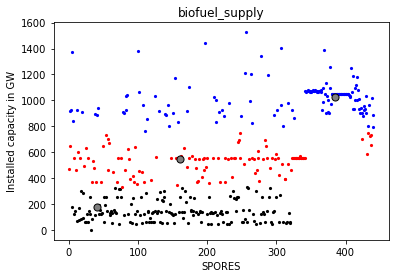

Techology: biofuel_supply



<Figure size 432x288 with 0 Axes>

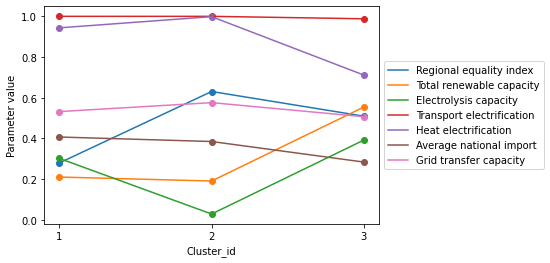

In [11]:
for i in range(2,10):
    num_of_cluster=cluster_check_function(ins_cap,gini_ins,paper_metrics,display_technology,i)
    if isinstance(num_of_cluster,int)==True:
        print("Ideal number of cluster:", num_of_cluster)
        break
        
[clusters,cluster_boundry]=clustered_data_function(ins_cap,gini_ins,paper_metrics,display_technology,num_of_cluster)
cluster_figure=cluster_plot_function(display_technology,cluster_boundry,clusters)
parameter_figure=parameter_plot_function(paper_metrics,display_technology,cluster_boundry,clusters,num_of_cluster)

In [7]:
cluster_id=int(input("which cluster do you want to analyze: "))

which cluster do you want to analyze: 1


Techology: wind_onshore
cluster ID: 1

Parameter: Regional equality index
Value for representative SPORE: 0.15
Minimum value for the cluster: 0.06
Maximum value for the cluster: 0.91

Parameter: Total wind capacity 
Value for representative SPORE: 0.29
Minimum value for the cluster: -0.0
Maximum value for the cluster: 0.4

Parameter: Electrolysis capacity 
Value for representative SPORE: 0.22
Minimum value for the cluster: 0.17
Maximum value for the cluster: 1.0

Parameter: Transport electrification
Value for representative SPORE: 1.0
Minimum value for the cluster: 1.0
Maximum value for the cluster: 1.0

Parameter: Heat electrification
Value for representative SPORE: 0.79
Minimum value for the cluster: 0.63
Maximum value for the cluster: 0.85

Parameter: Average national import
Value for representative SPORE: 0.33
Minimum value for the cluster: 0.27
Maximum value for the cluster: 0.42

Parameter: Grid transfer capacity
Value for representative SPORE: 0.36
Minimum value for the cluster:

<Figure size 432x288 with 0 Axes>

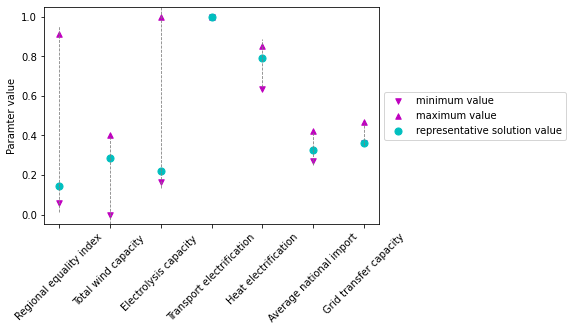

In [8]:
parameter_figure=parameter_plot_function_clusterwise(paper_metrics,display_technology,cluster_boundry,clusters,cluster_id)
parameter_figure.show()